<a href="https://colab.research.google.com/github/cpython-projects/python_da_06_11_25/blob/main/lesson_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шкали

## Номінальна шкала (Nominal Scale)

**Визначення:**
Номінальна шкала — це **категоріальні дані без упорядкування**.
Вона використовується для класифікації об’єктів за групами, які не мають кількісного або логічного порядку.

**Приклади:**

* Кольори: `red`, `blue`, `green`
* Тип продукту: `smartphone`, `laptop`
* Країна: `Ukraine`, `Germany`, `Japan`
* Стать: `male`, `female`

**Ключові особливості:**

* Значення не мають математичного сенсу (не можна додавати або усереднювати кольори)
* Можна обчислювати лише частоту (моду) — найчастіше значення
* Основні способи візуалізації: **кругові діаграми** та **стовпчикові графіки**

In [1]:
import pandas as pd

# Приклад: дані про клієнтів та їхні вподобання щодо кольору і типу продукту

data = {
    'Color': ['red', 'blue', 'green', 'blue', 'blue', 'red', 'green', 'red', 'red', 'blue'],
    'Product': ['smartphone', 'laptop', 'smartphone', 'tablet', 'laptop', 'tablet', 'laptop', 'smartphone', 'tablet', 'laptop'],
    'Country': ['Ukraine', 'Germany', 'Japan', 'Ukraine', 'Japan', 'Germany', 'Ukraine', 'Japan', 'Ukraine', 'Germany'],
    'Gender': ['male', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'male']
}

df = pd.DataFrame(data)
df.head()

,Color,Product,Country,Gender
0,red,smartphone,Ukraine,male
1,blue,laptop,Germany,female
2,green,smartphone,Japan,female
3,blue,tablet,Ukraine,male
4,blue,laptop,Japan,male


## Порядкова шкала (Ordinal Scale)

**Визначення:**
Порядкова шкала — це **категоріальні дані з упорядкуванням**,
але **інтервали між значеннями не рівні і не підлягають точному вимірюванню**.

**Приклади:**

* Рівень освіти: `primary < secondary < tertiary`
* Оцінка продукту: `1★ < 2★ < 5★`
* Стадія хвороби: `mild < moderate < severe`
* Рівень доходу: `low < medium < high`

**Ключові особливості:**

* Порядок **має значення**, але різниця між категоріями **не кількісна**
* Підходящі статистики: **медіана**, **ранг**
* Візуалізація: **упорядковані стовпчикові графіки**, **шкали Лайкерта**

In [ ]:
# Приклад даних: рівень задоволеності клієнтів

data = {
    'Satisfaction': ['very low', 'low', 'medium', 'high', 'very high', 'medium', 'low', 'medium', 'high', 'very high']
}

df = pd.DataFrame(data)
df

,Satisfaction
0,very low
1,low
2,medium
3,high
4,very high
5,medium
6,low
7,medium
8,high
9,very high


In [ ]:
# Вказуємо порядок категорій вручну (від низького до високого)

order = ['very low', 'low', 'medium', 'high', 'very high']
df['Satisfaction'] = pd.Categorical(df['Satisfaction'], categories=order, ordered=True)
df

,Satisfaction
0,very low
1,low
2,medium
3,high
4,very high
5,medium
6,low
7,medium
8,high
9,very high


### Якщо порядок **НЕ заданий** (`ordered=False`, значення за замовчуванням)

Pandas просто зберігає набір міток (labels), **не знаючи, яка "вище" чи "нижче"**.
Тобто `“low”` і `“high”` будуть розглядатися просто як різні категорії — **без логічного порядку**.


In [ ]:
df = pd.DataFrame({'Satisfaction': ['low', 'medium', 'high']})
df['Satisfaction'] = df['Satisfaction'].astype('category')
print(df['Satisfaction'].cat.ordered)

False


➡️ При цьому:

* сортування (`sort_values`) відбувається **за алфавітом**, а не за смисловим порядком;
* не можна порівнювати (`<`, `>`) категорії — це викличе помилку;
* медіану або ранги коректно обчислити неможливо.


### Якщо порядок **ЗАДАНИЙ** (`ordered=True`)

Тепер pandas розуміє, що `very low < low < medium < high < very high`.


In [ ]:
order = ['very low', 'low', 'medium', 'high', 'very high']
df['Satisfaction'] = pd.Categorical(df['Satisfaction'], categories=order, ordered=True)
print(df['Satisfaction'].cat.ordered)

True


Тепер можливі:

* **порівняння:**

  ```python
  df['Satisfaction'] > 'medium'
  ```

  поверне логічні значення;
* **коректне сортування:**

  ```python
  df.sort_values('Satisfaction')
  ```

  впорядкує дані не за алфавітом, а за смислом;
* **обчислення рангів і медіани за смисловим порядком.**


In [ ]:
df['Satisfaction'] > 'medium'

,Satisfaction
0,False
1,False
2,True


In [ ]:
df.sort_values('Satisfaction')

,Satisfaction
0,low
1,medium
2,high


### Короткий висновок

| Сценарій                               | ordered=False | ordered=True |
| -------------------------------------- | ------------- | ------------ |
| Можна сортувати за змістом             | ❌             | ✅            |
| Можна порівнювати категорії (`>`, `<`) | ❌             | ✅            |
| Медіана/ранг має сенс                  | ❌             | ✅            |
| Підходить для номінальних даних        | ✅             | ❌            |
| Підходить для порядкових даних         | ❌             | ✅            |

---

### Рекомендація

* Для **Nominal Scale** (`колір`, `країна`, `тип продукту`) → `ordered=False`
* Для **Ordinal Scale** (`low`, `medium`, `high`) → `ordered=True`


## Кількісна шкала (Quantitative Scale)

**Визначення:**
Кількісна шкала використовується для **числових даних, що мають математичний сенс**.
Вона дозволяє виконувати арифметичні операції: додавання, віднімання, множення та ділення.

**Підтипи:**

* **Дискретні (цілі значення)** — кількість товарів, число дітей у сім’ї
* **Неперервні (дробові значення)** — вага, зріст, температура, час доставки

**Приклади:**

* Вік: `25`, `30.5`
* Зарплата: `$50,000`
* Час доставки: `2.5 години`
* Перегляди сайту: `1,000,000`

**Ключові особливості:**

* Застосовні всі математичні операції (`+`, `−`, `×`, `÷`)
* Основні статистики: **середнє, стандартне відхилення, дисперсія**
* Типові візуалізації: **гістограми**, **boxplots**, **scatter plots**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Приклад кількісних даних: вік, зарплата, час доставки

data = {
    'Age': [23, 29, 35, 42, 45, 50, 56, 61, 65, 70],
    'Salary': [3000, 3500, 4000, 4500, 4800, 5200, 6000, 7000, 7200, 7500],
    'Delivery_time': [2.1, 2.5, 2.3, 2.0, 2.6, 2.8, 3.0, 2.9, 3.2, 2.7]
}

df = pd.DataFrame(data)
df


,Age,Salary,Delivery_time
0,23,3000,2.1
1,29,3500,2.5
2,35,4000,2.3
3,42,4500,2.0
4,45,4800,2.6
5,50,5200,2.8
6,56,6000,3.0
7,61,7000,2.9
8,65,7200,3.2
9,70,7500,2.7


## Порівняння типів шкал даних (Comparison of Scales)

| Критерій                                   | Nominal                | Ordinal                          | Quantitative                                             |
| ------------------------------------------ | ---------------------- | -------------------------------- | -------------------------------------------------------- |
| **Наявність порядку (Order)**              | ✘ Ні                   | ✔ Є                              | ✔ Є                                                      |
| **Рівні інтервали (Equal Intervals)**      | ✘ Ні                   | ✘ Ні                             | ✔ Так                                                    |
| **Математичні операції (Math Operations)** | ✘ Не застосовні        | ✘ Обмежені (тільки ранги)        | ✔ Всі арифметичні операції                               |
| **Основні статистики (Statistics)**        | Мода, частота          | Медіана, мода, ранги             | Середнє, медіана, мода, дисперсія, стандартне відхилення |
| **Приклади (Examples)**                    | Стать, кольори, країни | Рейтинги, освіта, стадії хвороби | Вага, зріст, температура, вік                            |

---

### Важливі зауваження

* ⚠️ **Типова помилка:** обчислювати середнє значення для порядкових даних (наприклад, "середня оцінка = 3.8") —
  математично некоректно, бо інтервали між категоріями не рівні.
* ✅ **Правило:** вибір статистичних методів і візуалізацій **залежить від типу шкали**.
  Перед аналізом завжди перевіряйте, чи відповідає ваш метод типу даних.


# Зведена статистика


**Поняття:**
Зведена статистика — це частина описової статистики, яка надає **коротке числове резюме даних**.
Вона допомагає швидко зрозуміти, як розподілені значення, де центр і який розкид.
Зведені показники (наприклад, середнє, медіана, стандартне відхилення) описують основні характеристики вибірки.

**Чому це важливо:**

* Допомагає зрозуміти загальну структуру даних.
* Дозволяє виявляти закономірності, тенденції та потенційні проблеми (наприклад, пропуски або викиди).
* Створює основу для подальшого аналізу, візуалізації або побудови моделей машинного навчання.

**Приклади зведених статистик:**

* Середнє значення (`mean`)
* Медіана (`median`)
* Мода (`mode`)
* Мінімум та максимум (`min`, `max`)
* Стандартне відхилення (`std`)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.price.mean()

np.float64(540088.1417665294)

In [7]:
df.price.median()

450000.0

<Axes: >

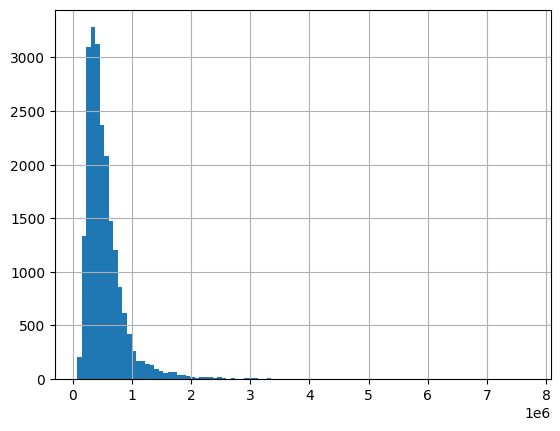

In [10]:
df.price.hist(bins=100)

In [17]:
df_1 = df[df['price'] < 1500000]

<Axes: >

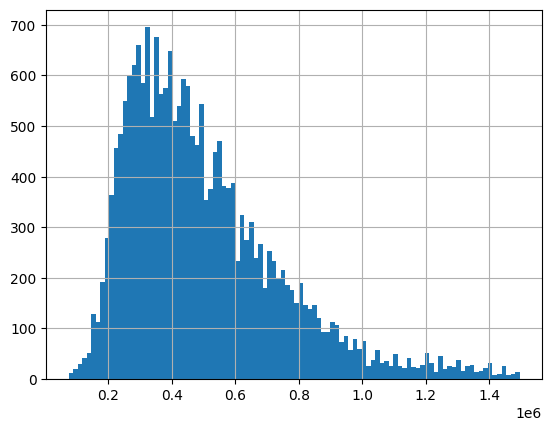

In [18]:
df_1.price.hist(bins=100)

In [19]:
df_1.price.mean(), df_1.price.median()

(np.float64(500472.3092030361), 445000.0)

In [20]:
df.price.mode()

,price
0,350000.0
1,450000.0


In [21]:
df.bedrooms.mode()

,bedrooms
0,3


In [24]:
df.price.min()

75000.0

In [25]:
df.price.max() - df.price.min()

7625000.0

In [26]:
df.price.std()

367127.1964826997

In [27]:
df_1.price.std()

246703.21907721937